In [2]:
import pandas as pd
import os

cwd = os.getcwd()
path = "./results/comparaison.csv"
data = pd.read_csv(path)

meanTimeCounting = 0
meanTimeQuick = 0
meanTimeQuickSeuil = 0
meanTimeQuickRdmSeuil = 0

meanTimeCountingSerieA = 0
meanTimeCountingSerieB = 0
meanTimeCountingSerieC = 0

meanTimeQuickSerieA = 0 
meanTimeQuickSerieB = 0 
meanTimeQuickSerieC = 0 

meanTimeQuickSeuilSerieA = 0 
meanTimeQuickSeuilSerieB = 0
meanTimeQuickSeuilSerieC = 0

meanTimeQuickRdmSeuilSerieA = 0
meanTimeQuickRdmSeuilSerieB = 0
meanTimeQuickRdmSeuilSerieC = 0

group = []
groupInt = 1
timeQuickData = []
timeCountingData = []
timeQuickSeuilData = []
timeQuickRdmSeuilData = []

NUMERO_SERIE = 9
NOMBRE_GROUPE_PAR_GROS_CHIFFRE = 3
NOMBRE_DE_GROS_CHIFFRES = 3

for k in range(NOMBRE_DE_GROS_CHIFFRES):
    for i in range(NOMBRE_GROUPE_PAR_GROS_CHIFFRE):
        for j in range(NUMERO_SERIE):
            timeCounting = data.iat[j + 1, 2]
            timeQuick = data.iat[j + 1, 3]
            timeQuickSeuil = data.iat[j + 1, 4]
            timeQuickRdmSeuil = data.iat[j + 1, 5]
            meanTimeCounting += timeCounting
            meanTimeQuick += timeQuick
            meanTimeQuickSeuil += timeQuickSeuil
            meanTimeQuickRdmSeuil += timeQuickRdmSeuil
        meanTimeCounting /= 10
        meanTimeQuick /= 10
        meanTimeQuickSeuil /= 10
        meanTimeQuickRdmSeuil /= 10
        if i == 0:
            meanTimeCountingSerieA = meanTimeCounting
            meanTimeQuickSerieA = meanTimeQuick
            meanTimeQuickSeuilSerieA = meanTimeQuickSeuil
            meanTimeQuickRdmSeuilSerieA = meanTimeQuickRdmSeuil
            timeCountingData.append(meanTimeCountingSerieA)
            timeQuickData.append(meanTimeQuickSerieA)
            timeQuickSeuilData.append(meanTimeQuickSeuilSerieA)
            timeQuickRdmSeuilData.append(meanTimeQuickRdmSeuilSerieA)
            group.append(groupInt)
            groupInt += 1
        if i == 1:
            meanTimeCountingSerieB = meanTimeCounting
            meanTimeQuickSerieB = meanTimeQuick
            meanTimeQuickSeuilSerieB = meanTimeQuickSeuil
            meanTimeQuickRdmSeuilSerieB = meanTimeQuickRdmSeuil
            timeCountingData.append(meanTimeCountingSerieB)
            timeQuickData.append(meanTimeQuickSerieB)
            timeQuickSeuilData.append(meanTimeQuickSeuilSerieB)
            timeQuickRdmSeuilData.append(meanTimeQuickRdmSeuilSerieB)
            group.append(groupInt)
            groupInt += 1

        if i == 2:
            meanTimeCountingSerieC = meanTimeCounting
            meanTimeQuickSerieC = meanTimeQuick
            meanTimeQuickSeuilSerieC = meanTimeQuickSeuil
            meanTimeQuickRdmSeuilSerieC = meanTimeQuickRdmSeuil
            timeCountingData.append(meanTimeCountingSerieC)
            timeQuickData.append(meanTimeQuickSerieC)
            timeQuickSeuilData.append(meanTimeQuickSeuilSerieC)
            timeQuickRdmSeuilData.append(meanTimeQuickRdmSeuilSerieC)
            group.append(groupInt)
            groupInt += 1

d = {'group': group,
    'timeCounting': timeCountingData,
    'timeQuick': timeQuickData,
    'timeQuickSeuil': timeQuickSeuilData, 
    'timeQuickRdmSeuil': timeQuickRdmSeuilData
    }

df = pd.DataFrame(data=d)
df.to_csv("output.csv", index=False, header=False)
print(df)

   group  timeCounting  timeQuick  timeQuickRdmSeuil  timeQuickSeuil
0      1      0.100041   0.411314           0.387829        0.378416
1      2      0.110045   0.452445           0.426612        0.416257
2      3      0.111045   0.456558           0.430490        0.420041
3      4      0.111145   0.456970           0.430878        0.420420
4      5      0.111155   0.457011           0.430917        0.420458
5      6      0.111156   0.457015           0.430920        0.420461
6      7      0.111156   0.457015           0.430921        0.420462
7      8      0.111156   0.457015           0.430921        0.420462
8      9      0.111156   0.457015           0.430921        0.420462


In [3]:
data.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,./exemplaires/testset_1000_0.txt,1000,0.155708,0.612555,0.540490,0.515876
1,./exemplaires/testset_1000_1.txt,1000,0.137166,0.551673,0.524033,0.499770
2,./exemplaires/testset_1000_2.txt,1000,0.114983,0.429917,0.412783,0.387639
3,./exemplaires/testset_1000_3.txt,1000,0.125237,0.433568,0.410110,0.454521
4,./exemplaires/testset_1000_4.txt,1000,0.103714,0.413134,0.390337,0.414256


In [4]:
import re

def getSerie(x):
    p = re.compile(".*_([^.]*)")
    g = p.match(x["filename"])
    numero = g.group(1)
    if len(numero) == 1:
        return "0"
    return numero[0]

data["serie"] = data.apply(getSerie, axis=1)
data.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
0,./exemplaires/testset_1000_0.txt,1000,0.155708,0.612555,0.540490,0.515876,0
1,./exemplaires/testset_1000_1.txt,1000,0.137166,0.551673,0.524033,0.499770,0
2,./exemplaires/testset_1000_2.txt,1000,0.114983,0.429917,0.412783,0.387639,0
3,./exemplaires/testset_1000_3.txt,1000,0.125237,0.433568,0.410110,0.454521,0
4,./exemplaires/testset_1000_4.txt,1000,0.103714,0.413134,0.390337,0.414256,0


In [5]:
data.shape[0]

180

In [36]:
dataNoZeros = data.loc[data["timeCounting"] > 0.001]
dataNoZeros.shape[0]
dataNoZeros["serie"].unique()
serieBCounting = dataNoZeros.loc[dataNoZeros["serie"] == "1"] 
serieBCounting.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
10,./exemplaires/testset_1000_10.txt,1000,1895.27,0.405703,0.393648,0.391630,1
11,./exemplaires/testset_1000_11.txt,1000,1937.12,0.384376,0.388884,0.415388,1
12,./exemplaires/testset_1000_12.txt,1000,1935.07,0.385651,0.382868,0.364870,1
13,./exemplaires/testset_1000_13.txt,1000,1923.20,0.397607,0.388729,0.391280,1
14,./exemplaires/testset_1000_14.txt,1000,1893.17,0.399724,0.384941,0.393908,1


In [7]:
serieA = data.loc[data["serie"] == "0"]
serieA.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
0,./exemplaires/testset_1000_0.txt,1000,0.155708,0.612555,0.540490,0.515876,0
1,./exemplaires/testset_1000_1.txt,1000,0.137166,0.551673,0.524033,0.499770,0
2,./exemplaires/testset_1000_2.txt,1000,0.114983,0.429917,0.412783,0.387639,0
3,./exemplaires/testset_1000_3.txt,1000,0.125237,0.433568,0.410110,0.454521,0
4,./exemplaires/testset_1000_4.txt,1000,0.103714,0.413134,0.390337,0.414256,0


In [8]:
serieB = data.loc[data["serie"] == "1"]
serieB.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
10,./exemplaires/testset_1000_10.txt,1000,1895.27,0.405703,0.393648,0.391630,1
11,./exemplaires/testset_1000_11.txt,1000,1937.12,0.384376,0.388884,0.415388,1
12,./exemplaires/testset_1000_12.txt,1000,1935.07,0.385651,0.382868,0.364870,1
13,./exemplaires/testset_1000_13.txt,1000,1923.20,0.397607,0.388729,0.391280,1
14,./exemplaires/testset_1000_14.txt,1000,1893.17,0.399724,0.384941,0.393908,1


In [9]:
serieC = data.loc[data["serie"] == "2"]
serieC.head()

,filename,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil,serie
20,./exemplaires/testset_1000_20.txt,1000,0.164828,3.492530,3.515890,0.317019,2
21,./exemplaires/testset_1000_21.txt,1000,0.156617,4.265470,4.331570,0.373613,2
22,./exemplaires/testset_1000_22.txt,1000,0.155272,1.502310,1.398380,0.332966,2
23,./exemplaires/testset_1000_23.txt,1000,0.150359,0.945712,0.974354,0.388628,2
24,./exemplaires/testset_1000_24.txt,1000,0.191856,1.259550,1.263130,0.333169,2


In [45]:
serieA = serieA.groupby("numbers").mean().reset_index()

In [46]:
serieB = serieB.groupby("numbers").mean().reset_index()
serieC = serieC.groupby("numbers").mean().reset_index()

serieBCountingMean = serieBCounting.groupby("numbers").mean().reset_index()
serieBCountingMean

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,2300.91,0.399006,0.392279,0.40022


# TABLEAUX

In [47]:
serieA

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,0.115611,0.472569,0.432465,0.439416
1,5000,0.512038,2.536519,2.450179,2.437307
2,10000,0.806963,5.227842,5.053352,5.364637
3,50000,4.098182,32.049810,30.790810,30.441270
4,100000,8.136531,66.929330,64.510050,65.131230
5,500000,45.746020,379.150500,369.774700,373.119600


In [48]:
serieB

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,2300.91,0.399006,0.392279,0.400220
1,5000,0.00,2.391536,2.346480,2.385079
2,10000,0.00,5.166858,5.042762,5.266829
3,50000,0.00,31.241700,30.976820,30.772840
4,100000,0.00,66.057810,65.224070,64.295480
5,500000,0.00,363.278400,359.408600,372.420000


In [49]:
serieC

,numbers,timeCounting,timeQuick,timeQuickSeuil,timeQuickRdmSeuil
0,1000,0.177699,2.518323,2.457705,0.353638
1,5000,0.889351,8.378851,8.459377,2.204078
2,10000,1.471629,17.783860,18.128350,4.968632
3,50000,7.222169,102.791860,103.358160,27.511370
4,100000,14.689970,189.747900,190.020700,59.188180
5,500000,83.406050,1490.861500,1489.347200,334.249000


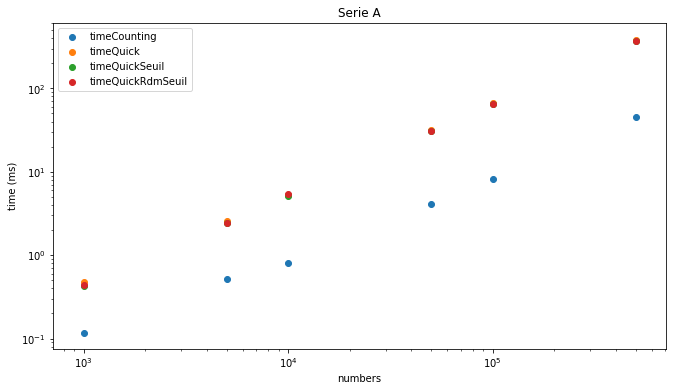

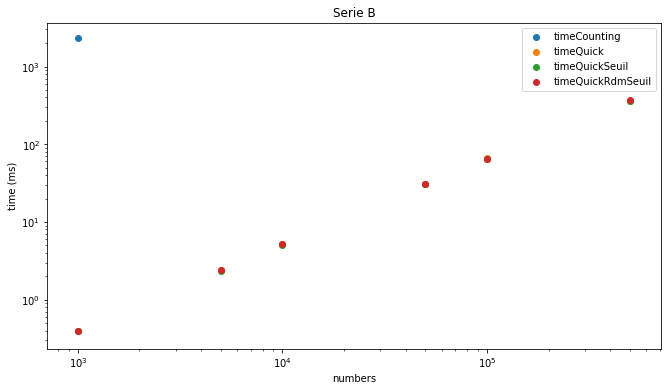

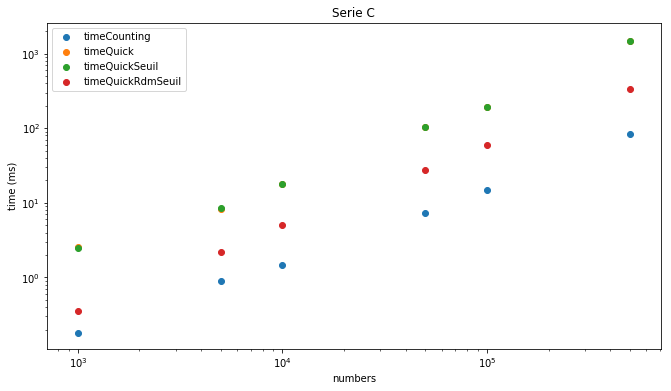

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
plt.yscale("log")
plt.xscale("log")

#plt.subplot(1,3,1)
plt.scatter(serieA["numbers"], serieA["timeCounting"])
plt.scatter(serieA["numbers"], serieA["timeQuick"])
plt.scatter(serieA["numbers"], serieA["timeQuickSeuil"])
plt.scatter(serieA["numbers"], serieA["timeQuickRdmSeuil"])
plt.title('Serie A')
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.show()

plt.figure(figsize=(11,6))
plt.yscale("log")
plt.xscale("log")

#plt.subplot(1,3,2)
plt.scatter(serieBCountingMean["numbers"], serieBCountingMean["timeCounting"])
plt.scatter(serieB["numbers"], serieB["timeQuick"])
plt.scatter(serieB["numbers"], serieB["timeQuickSeuil"])
plt.scatter(serieB["numbers"], serieB["timeQuickRdmSeuil"])
plt.title('Serie B')
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.show()

plt.figure(figsize=(11,6))
plt.yscale("log")
plt.xscale("log")

#plt.subplot(1,3,3)
plt.scatter(serieC["numbers"], serieC["timeCounting"])
plt.scatter(serieC["numbers"], serieC["timeQuick"])
plt.scatter(serieC["numbers"], serieC["timeQuickSeuil"])
plt.scatter(serieC["numbers"], serieC["timeQuickRdmSeuil"])
plt.title('Serie C')
plt.xlabel('numbers')
plt.ylabel('time (ms)')
plt.legend()
plt.show()
